In [57]:
#READ DATASET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

fire_data = pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")


In [58]:
# SIZE OF DATA
fire_data.shape

(17442, 7)

In [59]:
fire_data.duplicated().any()

False

In [60]:
# TYPES
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [61]:
# FIRST ROWS EXAMPLE
fire_data.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


In [62]:
# ANALYSE DATA
fire_data.describe()

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,6.975634,31.611111,0.497821
std,1.750977,54.773826,8.164096,4.736169,20.939149,0.500010
min,1.000000,10.000000,72.000000,0.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,3.200000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,5.800000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,11.200000,47.000000,1.000000
max,7.000000,190.000000,113.000000,17.000000,75.000000,1.000000


In [63]:
# ANALYSE FUEL
fire_data.describe(include=['object'])

,FUEL
count,17442
unique,4
top,gasoline
freq,5130


0    8759
1    8683
Name: STATUS, dtype: int64

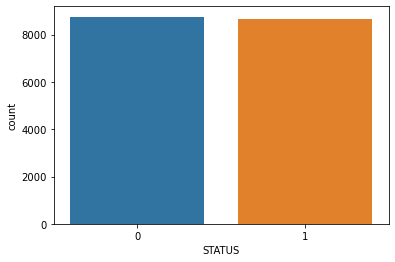

In [64]:
# FIRES EXTINGUISHED
sb.countplot(data=fire_data, x="STATUS")
fire_data['STATUS'].value_counts()

gasoline    5130
kerosene    5130
thinner     5130
lpg         2052
Name: FUEL, dtype: int64

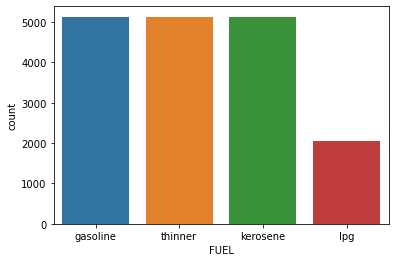

In [65]:
# FUEL USED
sb.countplot(data=fire_data, x="FUEL")
fire_data['FUEL'].value_counts()

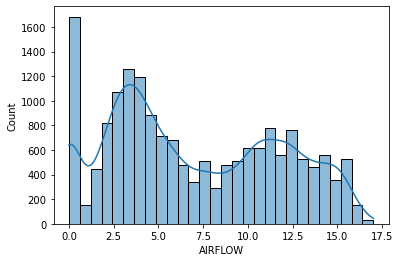

In [66]:
# NUMBER OF TESTS WITH SPECIFIC AIRFLOWS
showKDE = True # change to see line and bard
sb.histplot(data=fire_data, x="AIRFLOW", kde=showKDE)

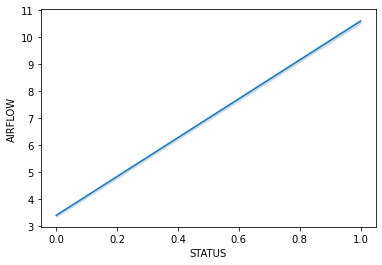

In [67]:
sb.lineplot(data=fire_data, x="STATUS", y="AIRFLOW")
#declive é o mesmo isolando cada tipo de combustivel


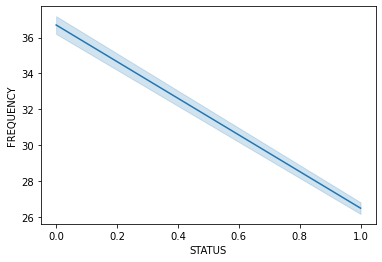

In [68]:
sb.lineplot(data=fire_data, x="STATUS", y="FREQUENCY")

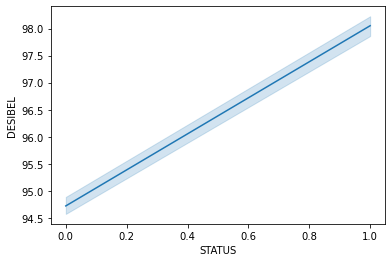

In [69]:
sb.lineplot(data=fire_data, x="STATUS", y="DESIBEL")

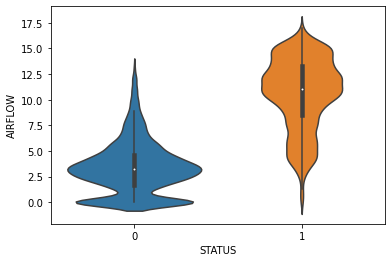

In [70]:
sb.violinplot(data=fire_data, x="STATUS", y="AIRFLOW")

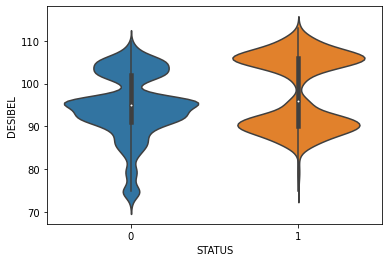

In [71]:
sb.violinplot(data=fire_data, x="STATUS", y="DESIBEL")

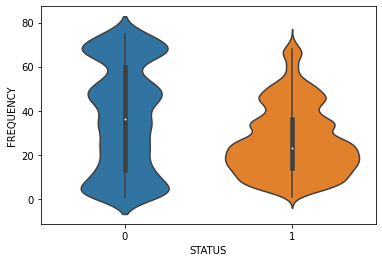

In [72]:
sb.violinplot(x=fire_data["STATUS"], y=fire_data["FREQUENCY"])

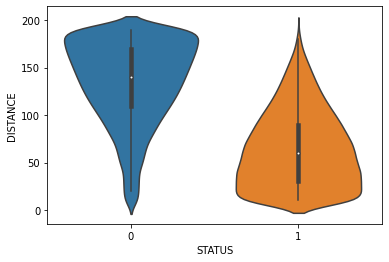

In [73]:
sb.violinplot(x=fire_data["STATUS"], y=fire_data["DISTANCE"])

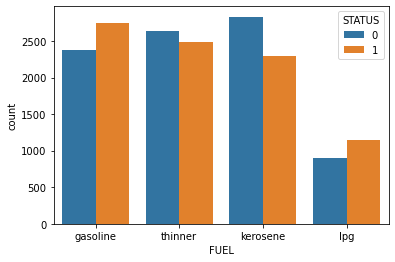

In [74]:
sb.countplot(data=fire_data, x="FUEL", hue="STATUS")


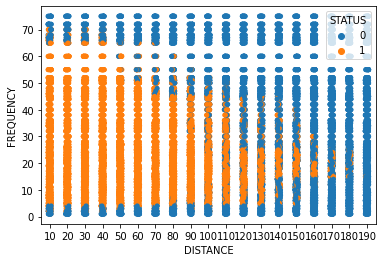

In [75]:
sb.stripplot(data=fire_data, x="DISTANCE", y="FREQUENCY", hue="STATUS")

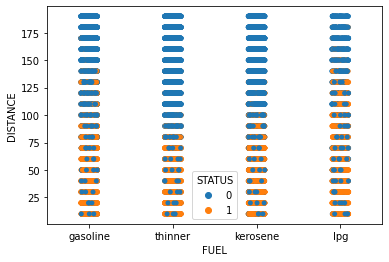

In [76]:
sb.stripplot(data=fire_data, x="FUEL", y="DISTANCE", hue="STATUS")

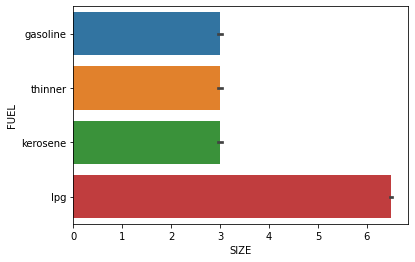

In [77]:
sb.barplot(data=fire_data, x="SIZE", y="FUEL")

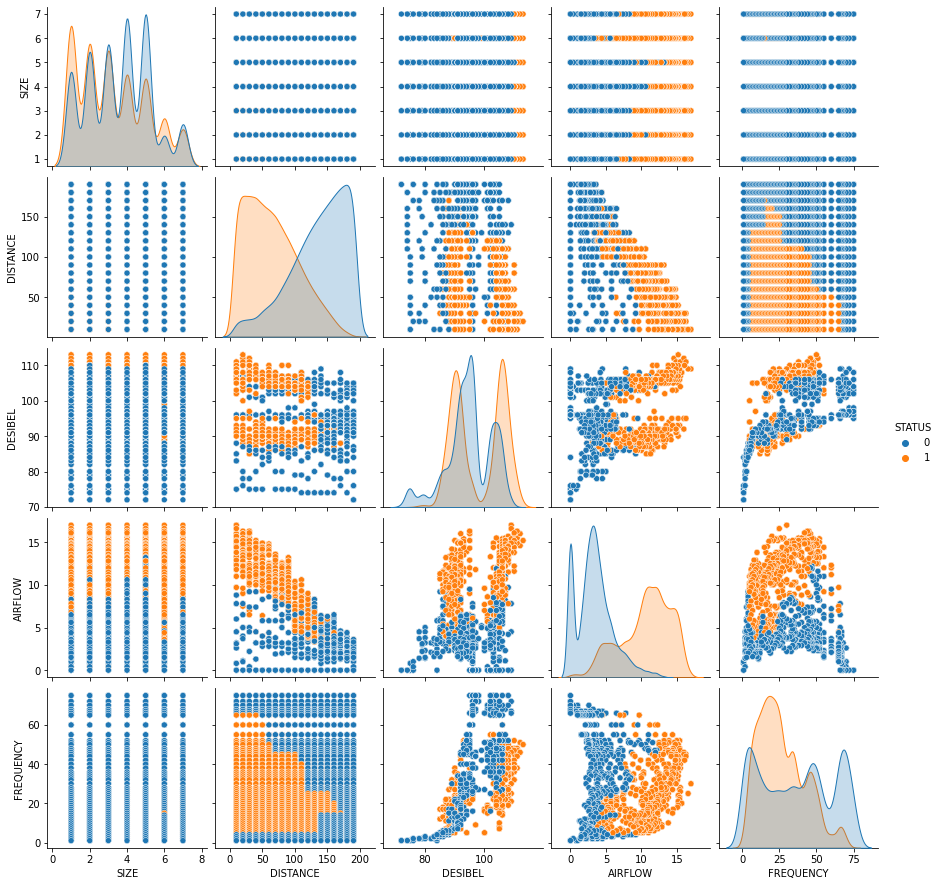

In [78]:
sb.pairplot(fire_data,hue='STATUS')

In [79]:
#from sklearn.preprocessing import OrdinalEncoder
#ord_encoder = OrdinalEncoder()
#fire_data["FUEL"] = ord_encoder.fit_transform(fire_data[["FUEL"]])
#ord_encoder.categories_
# A PARTIR DAQUI OS TIPOS DE COMBUSTIVEL SAO INTEIROS = AO INDICE NO ARRAY QUE APARECE QUANDO CORREMOS

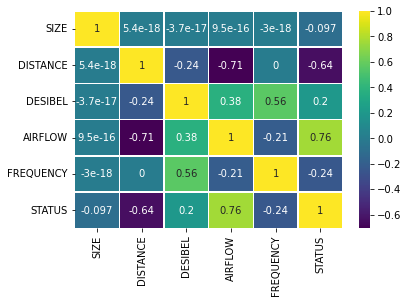

In [81]:
sb.heatmap(fire_data.corr(),annot=True,cmap='viridis',linewidths=0.5)


In [82]:
np.abs(fire_data.corr()['STATUS']).sort_values().tail(4)

FREQUENCY    0.244203
DISTANCE     0.644051
AIRFLOW      0.760628
STATUS       1.000000
Name: STATUS, dtype: float64